In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy import stats

from disp import set_font_size

# segment duration correlations

R = -0.6170823091548255 P = 4.944055802476383e-32


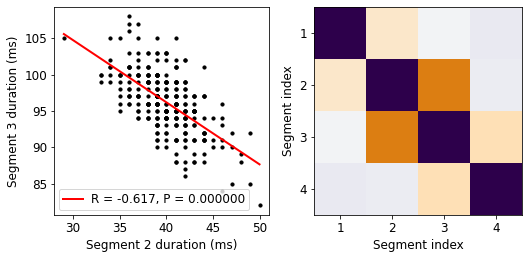

In [3]:
durs_all = loadmat('from_alison/durations_logpower_Or160.mat')
cc_log_power = loadmat('from_alison/cc_values_logpower_Or160.mat')['cc_values']

show_keys = ('duration2', 'duration3')
durs_x = durs_all[show_keys[0]].astype(float).flatten()
durs_y = durs_all[show_keys[1]].astype(float).flatten()

# durs_x = np.random.normal(0, .01, len(durs_x))
# durs_y = np.random.normal(0, .01, len(durs_y))

fig, axs = plt.subplots(1, 2, figsize=(7.5, 3.7), tight_layout=True)

slp, icpt, r, p_val, stderr = stats.linregress(durs_x, durs_y)
xs_line = np.array([durs_x.min(), durs_x.max()])
ys_line = slp*xs_line + icpt

axs[0].plot(xs_line, ys_line, c='r', lw=2)
axs[0].scatter(durs_all[show_keys[0]], durs_all[show_keys[1]], s=10, c='k')

axs[0].legend([f'R = {r:.3f}, P = {p_val:.6f}'], loc='lower left')
axs[0].set_xlabel(f'Segment {show_keys[0][-1]} duration (ms)')
axs[0].set_ylabel(f'Segment {show_keys[1][-1]} duration (ms)')

axs[1].matshow(cc_log_power, vmin=-1, vmax=1, cmap='PuOr')
axs[1].set_xticks(range(4))
axs[1].set_xticklabels(range(1, 5))
axs[1].xaxis.tick_bottom()
axs[1].set_yticks(range(4))
axs[1].set_yticklabels(range(1, 5))
axs[1].set_xlabel('Segment index')
axs[1].set_ylabel('Segment index')

set_font_size(axs, 12)

print('R =', r, 'P =', p_val)

fig.savefig('ms/4hi.svg')